# 1  Logistic Regression

We will build a logistic regression model to predict whether a student gets admitted into a university based on the scores from two exams conducted by the University.


Load Data

The first two columns contains the exam scores and the third column contains the label(whether the person got admission or not).

In [10]:
import pandas as pd
data = pd.read_csv("ex2/ex2data1.txt", header = None)
x = data.ix[:, 0:1]
y = data.ix[:, 2]

# 1.1Visualizing the data



x1 and x2 are Exam 1 and Exam 2 scores repectively when y is equal to 1. similarly, x3 and x4 are Exam 1 and Exam 2 scores repectively when y is equal to 0.

In [2]:
x1 = []
for i in range(len(x)):
    if y[i] == 1:
        x1.append(x[0][i])
        
x2 = []
for i in range(len(x)):
    if y[i] == 1:
        x2.append(x[1][i])
        
x3 = []
for i in range(len(x)):
    if y[i] == 0:
        x3.append(x[0][i])    
        
        
x4 = []
for i in range(len(x)):
    if y[i] == 0:
        x4.append(x[1][i])


Plotting the data.

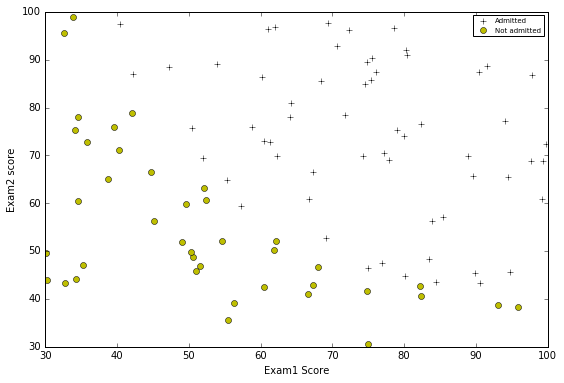

In [233]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [9, 6]
plt.plot(x1, x2, "k+", label = "Admitted")
plt.plot(x3, x4, "yo", label = "Not admitted")
plt.xlabel("Exam1 Score")
plt.ylabel("Exam2 score")
plt.legend(loc = "upper right", fontsize = "x-small", numpoints = 1 )
plt.ylim((30,100))
plt.xlim((30,100))
plt.show()

                    Figure 1: Scatter plot of training data

# 1.2 Implementation

## 1.2.1 Warmup exercise: sigmoid function

In [12]:
import numpy as np
def sigmoid(z):
    denominator = 1 + np.exp(-1 * z)
    g = 1 / denominator
    return g
    

## 1.2.2 Cost function and gradient

In [12]:
def cost(theta, x, y):
    m = len(y)
    temp1 = -1 * y.dot(np.log(sigmoid(x.dot(theta))))
    temp2 = (1 - y).dot(np.log(1 - sigmoid(x.dot(theta))))
    
    J = np.sum(temp1 - temp2) / (m * 1.0)
    
    return J


def gradient(theta, x, y):
    m = len(y)
    grad = x.T.dot((sigmoid(x.dot(theta))) - y) * 1.0/m
    return grad.flatten()

Inserting a column containing one and initializing theta.

In [5]:
import numpy as np
[m, n] = np.shape(x)
x.insert(0, "ones", 1)
initial_theta = np.zeros((n+1, 1))


# 1.2.3 Learning parameters using scipy.optimize


In [6]:
import scipy.optimize as op
minimized_values = op.fmin_tnc(func = cost, x0 = initial_theta, args = (x.values, y.values), fprime = gradient)
optimal_theta = minimized_values[0]

##                                                 or

In [7]:
minimized_values1 = op.minimize(fun = cost, x0 = initial_theta, args = (x.values, y.values), method = 'TNC', jac = gradient)
optimal_theta1 = minimized_values1.x

## Decision Boundary

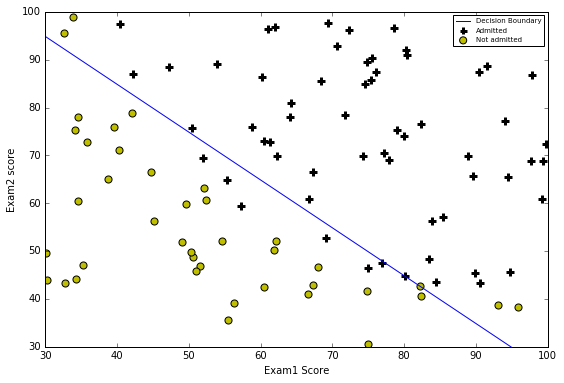

In [281]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [9, 6]
plt.scatter(x1, x2, s = 50, c = 'black', marker = "+", linewidths = 3, label = "Admitted")
plt.scatter(x3, x4, s=50, c='y', marker = "o", linewidths = 1, label = "Not admitted")

plot_x = np.linspace(min(x[1].values) - 2,  max(x[1]) + 2, 50)
plot_y = (-1./optimal_theta[2]) * (optimal_theta[2] * plot_x + optimal_theta[0])
plt.plot(plot_x, plot_y, label = "Decision Boundary")

plt.xlabel("Exam1 Score")
plt.ylabel("Exam2 score")
plt.legend(loc = "upper right", fontsize = "x-small", scatterpoints=1)
plt.ylim((30,100))
plt.xlim((30,100))
plt.show()

             Figure 2: Training data with decision boundary

# 1.2.4 Evaluating logistic regression

Predicting probability for a student with score 45 on exam 1 and score 85 on exam 2 to get admission.

In [9]:
prob = sigmoid(np.array([1, 45, 85]).dot(optimal_theta))
prob

0.77629062212973832

#### Computing accuracy on our training set

This function predicts the probability of getting admission for the training data.

In [155]:
def predict(theta, x):
    p = sigmoid(x.values.dot(theta))
    for i in range(len(p)):
        p[i] = round(p[i])
    return p

Accuracy in percentage is computed below.

In [311]:
p = predict(optimal_theta, x)
count = 0
i = 0
while i < len(y):
    if y.values[i] == p[i]:
        count = count + 1
    i = i + 1
percentage = ((1.0 * count)/len(y)) * 100
print "Training Accuracy: ", percentage, "%"


Training Accuracy:  89.0 %


# 2    Regularized logistic regression

We will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA) based on two different tests.

Load data.

The first two columns contains the X values and the third column contains the label (y).

In [7]:
import pandas as pd
import numpy as np
data = pd.read_csv("ex2/ex2data2.txt", header = None)
x = data.ix[:, 0:1]
y = data.ix[:, 2]

# 2.1  Visualizing the data

In [4]:
x1 = []
for i in range(len(x)):
    if y[i] == 1:
        x1.append(x[0][i])
        
x2 = []
for i in range(len(x)):
    if y[i] == 1:
        x2.append(x[1][i])
        
x3 = []
for i in range(len(x)):
    if y[i] == 0:
        x3.append(x[0][i])    
        
        
x4 = []
for i in range(len(x)):
    if y[i] == 0:
        x4.append(x[1][i])


plotting the data.

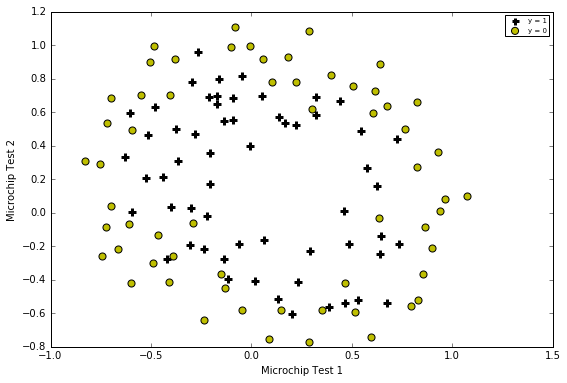

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [9, 6]
plt.scatter(x1, x2, s = 50, c = 'black', marker = "+", linewidths = 3, label = "y = 1")
plt.scatter(x3, x4, s = 50, c = 'y', marker = "o", linewidths = 1, label = "y = 0")
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(loc = "upper right", fontsize = "x-small", scatterpoints=1)
plt.xlim((-1, 1.5 ))
plt.ylim((-0.8, 1.2))
plt.yticks(np.arange(-0.8, 1.4, 0.2))
plt.show()

                       Figure 3: Plot of training data

# 2.2  Feature mapping

One way to fit the data better is to create more features from each data point. We will map the features into all polynomial terms of first column of x and second column of x upto the sixth power. As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector.

In [55]:
def mapfeature(x1, x2):
    degree = 6
    out = np.ones((len(x1), 1))
    for i in range(1, 7):
        for j in range(0, i + 1):
            out = np.append(out, ((x1 ** (i - j)) * (x2 ** j)).reshape(len(x1), 1), axis = 1)
    return out

#### Initialize fitting parameters


In [158]:
a = x.ix[:, 0]
b = x.ix[:, 1]
X = pd.DataFrame(mapfeature(a, b))
[m, n] = np.shape(X)
initial_theta = np.zeros((n, ))



# 2.3 Cost function and gradient

In [106]:

def cost(theta, x, y, l):
    m = x.shape[0]
    temp = 0
    for i in range(0, m):
        temp += -y[i] * np.log(sigmoid(theta.dot(x[i]))) - (1 - y[i]) * np.log(1 - sigmoid(theta.dot(x[i])))
    J =  temp/m + ((l/(2 * m)) * np.sum(theta ** 2))
    return J

def gradient(theta, x, y, l):
    [m, n] = x.shape
    grad = np.zeros((n,))
    sum = 0
    for i in range(0,m):
        sum += ((sigmoid(theta.dot(x[i])) - y[i]) * x[i][0])
    grad[0] = sum/m 
    
    for j in range(0, n):
        sum = 0
        for i in range(0, m):
            sum += (sigmoid(theta.dot(x[i])) - y[i]) * x[i][j]
        grad[j] = sum/(m) + (l/(m)) * theta[j]
    return grad        

Initial cost and gradient for regularized logistic regression.

In [107]:
cost(initial_theta, X.values, y.values, l), gradient(initial_theta, X.values, y.values, l)



(0.69314718055994606,
 array([  8.47457627e-03,   1.87880932e-02,   7.77711864e-05,
          5.03446395e-02,   1.15013308e-02,   3.76648474e-02,
          1.83559872e-02,   7.32393391e-03,   8.19244468e-03,
          2.34764889e-02,   3.93486234e-02,   2.23923907e-03,
          1.28600503e-02,   3.09593720e-03,   3.93028171e-02,
          1.99707467e-02,   4.32983232e-03,   3.38643902e-03,
          5.83822078e-03,   4.47629067e-03,   3.10079849e-02,
          3.10312442e-02,   1.09740238e-03,   6.31570797e-03,
          4.08503006e-04,   7.26504316e-03,   1.37646175e-03,
          3.87936363e-02]))

## 2.3.1 Learning parameters using scipy.optimize

In [165]:
import scipy.optimize as op
minimized_values = op.fmin_tnc(func = cost, x0 = initial_theta, args = (X.values, y.values,1.0), fprime = gradient)
optimal_theta = minimized_values[0]
optimal_theta

array([ 1.14201563,  0.60123714,  1.16715812, -1.87180901, -0.91567127,
       -1.26944015,  0.12678674, -0.36850107, -0.34494252, -0.17391073,
       -1.42370671, -0.04838579, -0.60631733, -0.26916588, -1.16320193,
       -0.24269706, -0.20697486, -0.04305268, -0.28008546, -0.28708931,
       -0.46912457, -1.03629766,  0.0290438 , -0.2925073 ,  0.01716377,
       -0.32880516, -0.13795624, -0.93187565])

### or

In [109]:
minimized_values1 = op.minimize(fun = cost, x0 = initial_theta, args = (X.values, y.values, l), method = 'TNC', jac = gradient)
optimal_theta1 = minimized_values1.x
optimal_theta1

array([ 1.14201563,  0.60123714,  1.16715812, -1.87180901, -0.91567127,
       -1.26944015,  0.12678674, -0.36850107, -0.34494252, -0.17391073,
       -1.42370671, -0.04838579, -0.60631733, -0.26916588, -1.16320193,
       -0.24269706, -0.20697486, -0.04305268, -0.28008546, -0.28708931,
       -0.46912457, -1.03629766,  0.0290438 , -0.2925073 ,  0.01716377,
       -0.32880516, -0.13795624, -0.93187565])

# 2. 4  Plotting the decision boundary

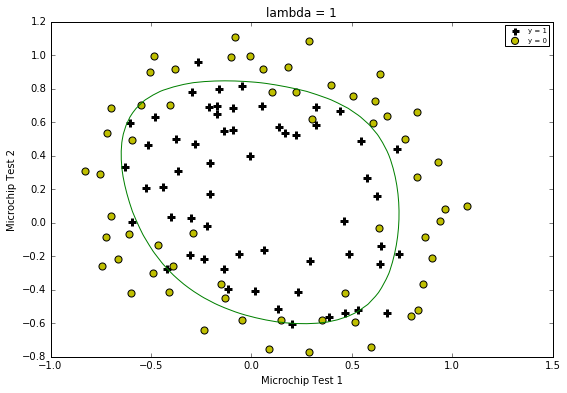

In [166]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [9, 6]
plt.scatter(x1, x2, s = 50, c = 'black', marker = "+", linewidths = 3, label = "y = 1")
plt.scatter(x3, x4, s = 50, c = 'y', marker = "o", linewidths = 1, label = "y = 0")

u = np.linspace(-1,1.5,50)
v = np.linspace(-1,1.5,50)
U,V = np.meshgrid(u,v)
z = np.zeros((len(u), len(v)))
degree = 6
k = 0
for i in range(0,degree+1):
        for j in range(0,i+1):
            z = z + (((U ** (i-j)) * (V ** j)) * optimal_theta[k])
            k += 1
plt.contour(U, V, z, levels = [0], label = "Decision Boundary", colors = "green")

plt.title("lambda = 1")
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(loc = "upper right", fontsize = "x-small", scatterpoints=1)
plt.xlim((-1, 1.5 ))
plt.ylim((-0.8, 1.2))
plt.yticks(np.arange(-0.8, 1.4, 0.2))
plt.show()

        Figure 4: Training data with decision boundary (λ = 1)

#### Computing accuracy on our training set

Accuracy in percentage is computed below.

In [161]:
p = predict(optimal_theta, X)
count = 0
i = 0
while i < len(y):
    if y.values[i] == p[i]:
        count = count + 1
    i = i + 1
percentage = ((1.0 * count)/len(y)) * 100
print "Training Accuracy: ", percentage, "%"


Training Accuracy:  81.3559322034 %


# 2.5 Optional (ungraded) exercises

We will try out different regularization parameters l for the dataset to understand how regularization prevents over- fitting.

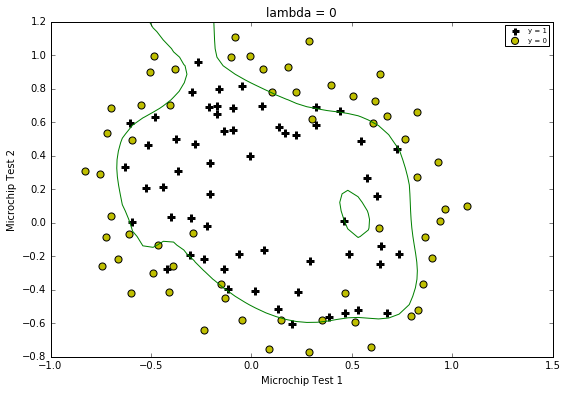

In [167]:
minimized_values = op.fmin_tnc(func = cost, x0 = initial_theta, args = (X.values, y.values, 0), fprime = gradient)
optimal_theta = minimized_values[0]

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [9, 6]
plt.scatter(x1, x2, s = 50, c = 'black', marker = "+", linewidths = 3, label = "y = 1")
plt.scatter(x3, x4, s = 50, c = 'y', marker = "o", linewidths = 1, label = "y = 0")

u = np.linspace(-1,1.5,50)
v = np.linspace(-1,1.5,50)
U,V = np.meshgrid(u,v)
z = np.zeros((len(u), len(v)))
degree = 6
k = 0
for i in range(0,degree+1):
        for j in range(0,i+1):
            z = z + (((U ** (i-j)) * (V ** j)) * optimal_theta[k])
            k += 1
plt.contour(U, V, z, levels = [0], label = "Decision Boundary", colors = "green")

plt.title("lambda = 0")
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(loc = "upper right", fontsize = "x-small", scatterpoints=1)
plt.xlim((-1, 1.5 ))
plt.ylim((-0.8, 1.2))
plt.yticks(np.arange(-0.8, 1.4, 0.2))
plt.show()

         Figure 5: No regularization (Overfitting) (λ = 0)

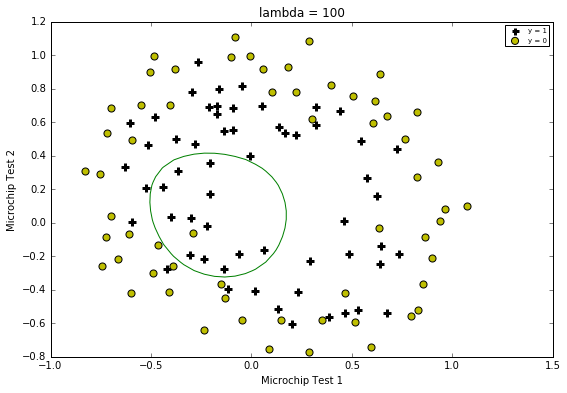

In [168]:
minimized_values = op.fmin_tnc(func = cost, x0 = initial_theta, args = (X.values, y.values, 100.0), fprime = gradient)
optimal_theta = minimized_values[0]

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [9, 6]
plt.scatter(x1, x2, s = 50, c = 'black', marker = "+", linewidths = 3, label = "y = 1")
plt.scatter(x3, x4, s = 50, c = 'y', marker = "o", linewidths = 1, label = "y = 0")

u = np.linspace(-1,1.5,50)
v = np.linspace(-1,1.5,50)
U,V = np.meshgrid(u,v)
z = np.zeros((len(u), len(v)))
degree = 6
k = 0
for i in range(0,degree+1):
        for j in range(0,i+1):
            z = z + (((U ** (i-j)) * (V ** j)) * optimal_theta[k])
            k += 1
plt.contour(U, V, z, levels = [0], label = "Decision Boundary", colors = "green")

plt.title("lambda = 100")
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(loc = "upper right", fontsize = "x-small", scatterpoints=1)
plt.xlim((-1, 1.5 ))
plt.ylim((-0.8, 1.2))
plt.yticks(np.arange(-0.8, 1.4, 0.2))
plt.show()

          Figure 6: Too much regularization (Underfitting) (λ = 100)